In [ ]:
# question 1 part-a

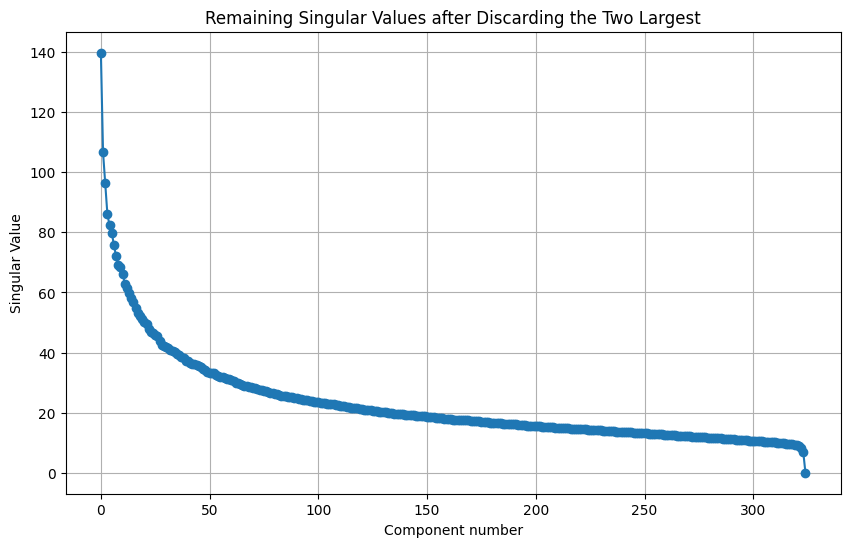

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


extracted_dir = '/content/horses'

horse_images = []
for filename in sorted(os.listdir(extracted_dir)):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        image_path = os.path.join(extracted_dir, filename)
        image = Image.open(image_path).convert('L')
        horse_images.append(np.array(image).flatten())

horse_images_matrix = np.array(horse_images) / 255.0


pca = PCA()
pca.fit(horse_images_matrix)


remaining_singular_values = pca.singular_values_[2:]


plt.figure(figsize=(10, 6))
plt.plot(remaining_singular_values, marker='o')
plt.title("Remaining Singular Values after Discarding the Two Largest")
plt.xlabel("Component number")
plt.ylabel("Singular Value")
plt.grid(True)
plt.show()


In [ ]:
#part-b

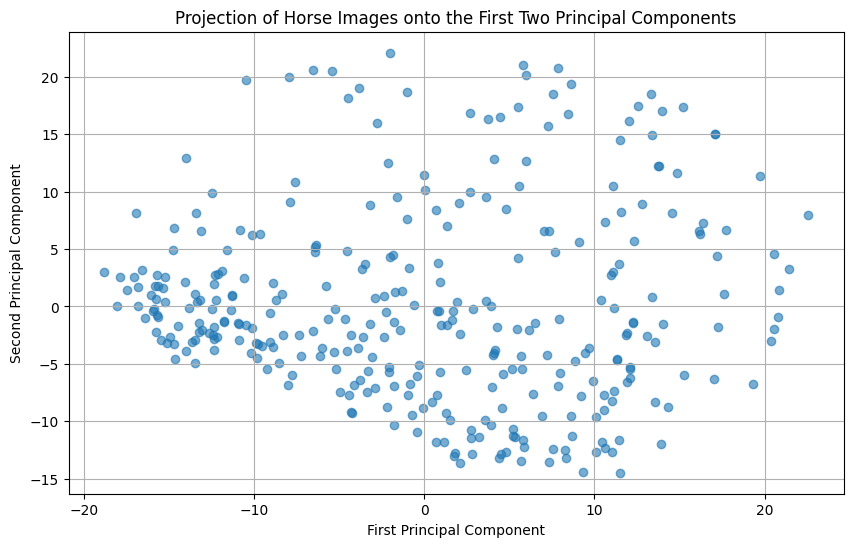

In [ ]:

projected_horses = pca.fit_transform(horse_images_matrix)[:, :2]

plt.figure(figsize=(10, 6))
plt.scatter(projected_horses[:, 0], projected_horses[:, 1], alpha=0.6)
plt.title('Projection of Horse Images onto the First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()


In [ ]:
#part-c

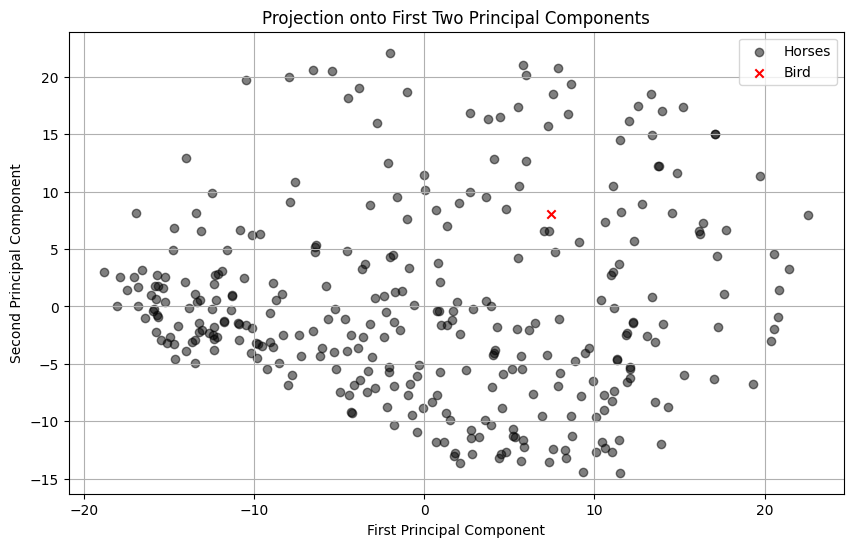

In [ ]:


bird_image_path = '/content/bird128.png'
bird_image = Image.open(bird_image_path).convert('L')
bird_image_flat = np.array(bird_image).flatten() / 255.0

bird_image_centered = bird_image_flat - horse_images_matrix.mean(axis=0)


bird_image_projected = pca.transform(bird_image_centered.reshape(1, -1))


plt.figure(figsize=(10, 6))
plt.scatter(horse_images_projected[:, 0], horse_images_projected[:, 1], alpha=0.5, color='black', label='Horses')
plt.scatter(bird_image_projected[:, 0], bird_image_projected[:, 1], color='red', marker='x', label='Bird')
plt.title("Projection onto First Two Principal Components")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#part-d

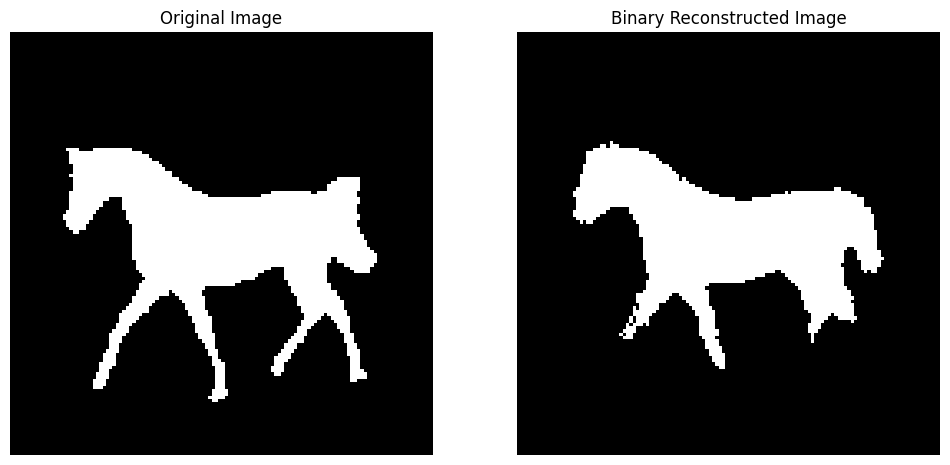

In [ ]:

horse_image_pca = pca_20.transform(horse_image_flat.reshape(1, -1))
horse_image_reconstructed = pca_20.inverse_transform(horse_image_pca)

original_shape = horse_image.size[::-1]
horse_image_reconstructed_2d = horse_image_reconstructed.reshape(original_shape)

threshold_value = 0.5
horse_image_binary = (horse_image_reconstructed_2d >= threshold_value).astype(np.float32)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].imshow(horse_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(horse_image_binary, cmap='gray')
axes[1].set_title('Binary Reconstructed Image')
axes[1].axis('off')

plt.show()

In [ ]:
#part-e

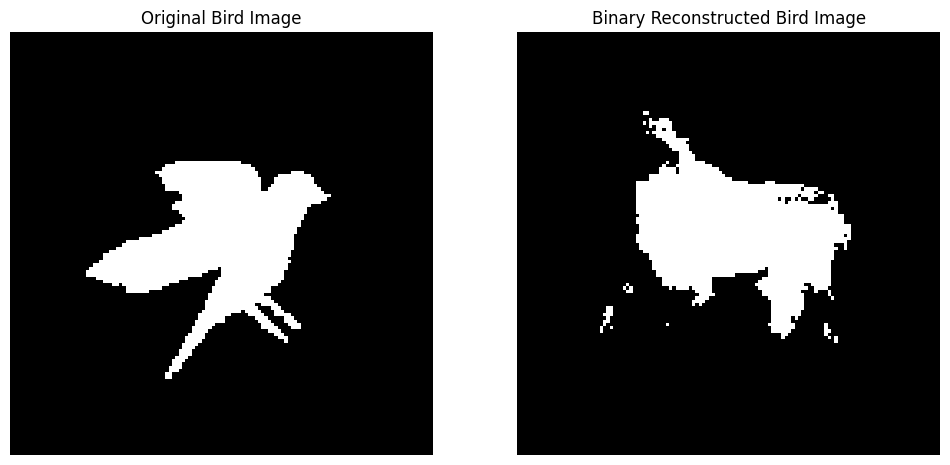

In [ ]:



bird_image_path = '/content/bird128.png'
bird_image = Image.open(bird_image_path).convert('L')
bird_image_flat = np.array(bird_image).flatten() / 255.0


bird_image_pca = pca_20.transform(bird_image_flat.reshape(1, -1))

bird_image_reconstructed = pca_20.inverse_transform(bird_image_pca)

original_shape = bird_image.size[::-1]
bird_image_reconstructed_2d = bird_image_reconstructed.reshape(original_shape)


threshold_value = 0.5
bird_image_binary = (bird_image_reconstructed_2d >= threshold_value).astype(np.float32)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].imshow(bird_image, cmap='gray')
axes[0].set_title('Original Bird Image')
axes[0].axis('off')


axes[1].imshow(bird_image_binary, cmap='gray')
axes[1].set_title('Binary Reconstructed Bird Image')
axes[1].axis('off')

plt.show()


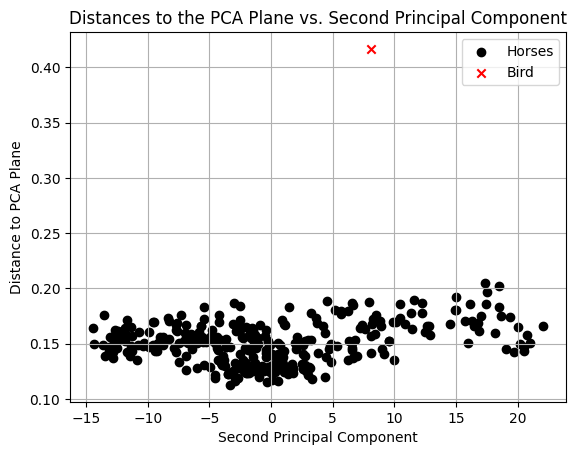

In [ ]:
# part f
pc_32 = PCA(n_components=32)
pc_32.fit(horse_images_matrix)

projected_horses_32 = pc_32.transform(horse_images_matrix)


bird_projected_32 = pc_32.transform(bird_image_centered.reshape(1, -1))

reconstructed_horses_32 = pc_32.inverse_transform(projected_horses_32)
reconstructed_bird_32 = pc_32.inverse_transform(bird_projected_32)


distances_horses = np.sqrt(np.mean((horse_images_matrix - reconstructed_horses_32) ** 2, axis=1))
distance_bird = np.sqrt(np.mean((bird_image_centered - reconstructed_bird_32) ** 2))


plt.scatter(projected_horses_32[:, 1], distances_horses, color='black', label='Horses')
plt.scatter(bird_projected_32[0, 1], distance_bird, color='red', marker='x', label='Bird')
plt.title('Distances to the PCA Plane vs. Second Principal Component')
plt.xlabel('Second Principal Component')
plt.ylabel('Distance to PCA Plane')
plt.legend()
plt.grid(True)
plt.show()


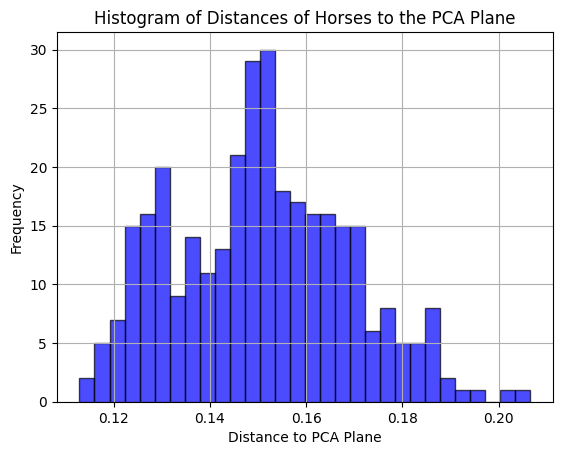

In [ ]:
# part g
plt.hist(distances_horses, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Distances of Horses to the PCA Plane')
plt.xlabel('Distance to PCA Plane')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
